In [23]:
# Import web scraping, pandas and matplotlib dependencies
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt

In [24]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless = False)

In [25]:
# Visit the MArs temperature website.
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [28]:
html = browser.html
mars_soup = soup(html, 'html.parser')
# scraping all the rows with data
table_rows = mars_soup.find_all('tr', class_="data-row")
print(table_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [29]:
rows_list = []

table_rows = mars_soup.find_all('tr', class_="data-row")

for row in table_rows:
    row_data = row.find_all('td')
    
    temps = []
    
    for data in row_data:
        temps.append(data.text)
    
    
    rows_list.append(temps)

rows_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [30]:
mars_df = pd.read_html(url)
mars_table = mars_df[0]
mars_table

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [31]:
# Assemle scraped data into a Pandas DataFrame.
new_df = pd.DataFrame(rows_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
new_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [32]:
#Examine the data types of the DataFrame columns.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [34]:
# convert the data to the appropriate data types.
new_df.terrestrial_date = pd.to_datetime(new_df.terrestrial_date)
new_df.sol = new_df.sol.astype('int')
new_df.ls = new_df.ls.astype('int')
new_df.month = new_df.month.astype('int')
new_df.min_temp = new_df.min_temp.astype('float')
new_df.pressure = new_df.pressure.astype('float')

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


In [36]:
# Question 6
mars_months = new_df['month'].nunique()
mars_months

12

In [37]:
# Question 7
martian_days = new_df['sol'].nunique()
martian_days

1867

In [38]:
coldest_month = new_df.groupby('month')['min_temp'].mean()
coldest_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [39]:
min_temp = coldest_month.min()
max_temp = coldest_month.max()

print(min_temp)
print(max_temp)

-83.30729166666667
-68.38297872340425


In [40]:
# Coldest month is the third month and warmest month is the eighth month.

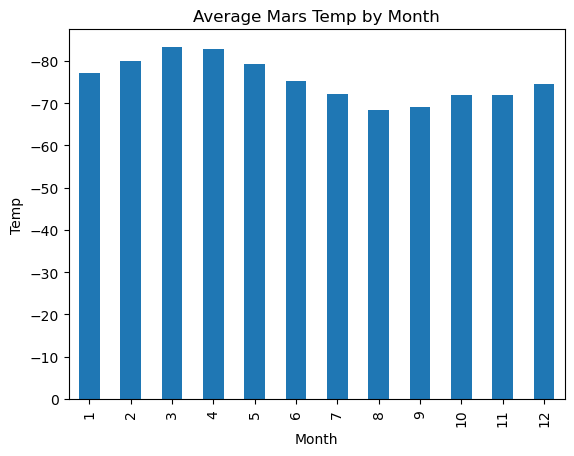

In [41]:
coldest_month.plot(kind = 'bar')
plt.title("Average Mars Temp by Month")
plt.xlabel("Month")
plt.ylabel("Temp")
plt.gca().invert_yaxis()
plt.show()

In [42]:
# Question 9
atmospheric_pressure = new_df.groupby('month')['pressure'].mean()
atmospheric_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [18]:
min_pressure = atmospheric_pressure.min()
max_pressure = atmospheric_pressure.max()

print (min_pressure)
print(max_pressure)

745.0544217687075
913.3059701492538


In [43]:
# The sixth month has the lowest and the nineth months has the highest atmospheric pressure on Mars.

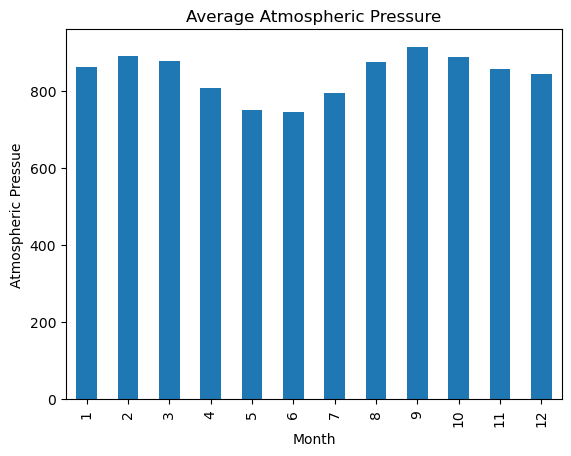

In [44]:
atmospheric_pressure.plot(kind = 'bar')
plt.title("Average Atmospheric Pressure")
plt.ylabel('Atmospheric Pressue')
plt.xlabel('Month')
plt.show()

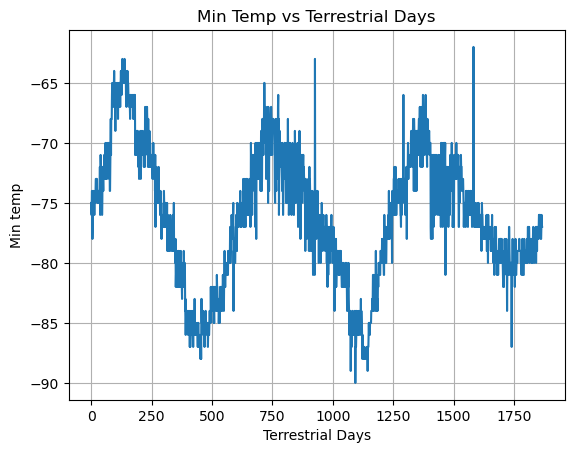

In [45]:
# Question 10
new_df.min_temp.plot()
plt.title('Min Temp vs Terrestrial Days')
plt.ylabel('Min temp')
plt.xlabel('Terrestrial Days')
plt.grid()
plt.show()

In [47]:
# Question 10 Answer:
#By estimating the two peaks of the highest temperatures being 700 and 1400 terrestrial days, there are about 700 terrestrial
#days in a Martian year.


In [48]:
# Export the DataFrame to a CSV file.
new_df.to_csv('mars_data2.csv')

In [49]:
browser.quit()